In [8]:
import pandas as pd
import numpy as np
from collections import defaultdict
brown_df = pd.read_csv('brown_clusters.tsv', sep='\t', header=0, names=['cluster', 'word', 'count'])

number_of_iterations = 10
def preform_bpe(brown_df, number_of_iterations, verbose = False):
   
    arr = [([*str(word), 'END'], count) for word, count in zip(brown_df['word'], brown_df['count'])]
    for i in range(number_of_iterations):
        d = defaultdict(int)
        for word_list, count  in arr:
            for j in range(len(word_list) - 1):
                d[(word_list[j], word_list[j + 1])] += count
        d = sorted(d.items(), key = lambda x: x[1], reverse=True)
        
        new_symbol_pair = d[0][0]
        if verbose: 
            print(new_symbol_pair)

        for k in range(len(arr)):
            word_list, count = arr[k]
            new_list = []
            j = 0
            while j < len(word_list):
                if j == len(word_list) - 1:
                    new_list.append(word_list[j])
                    j += 1
                elif word_list[j] == new_symbol_pair[0] and word_list[j + 1] == new_symbol_pair[1]:
                    new_list.append("".join(new_symbol_pair))
                    j += 2
                else:
                    new_list.append(word_list[j])
                    j += 1
            arr[k] = new_list, count

    return [ " ". join(word_list) for word_list, count in arr]


In [41]:
from nose.tools import assert_list_equal
data = {'cluster': range(2), 'word':['ala', 'mama'], 'count': [5,10]}
df = pd.DataFrame (data, columns = ['cluster', 'word', 'count'])
vocab = preform_bpe(df, 1)
assert_list_equal(vocab, ['a l a END', 'ma ma END'])

In [44]:
preform_bpe(brown_df, 50, verbose=True)

('e', 'END')
('t', 'END')
('s', 'END')
('i', 'n')
('t', 'h')
('d', 'END')
('y', 'END')
('.', 'END')
('o', 'END')
('r', 'END')
('a', 'n')
('>', 'END')
('o', 'n')
('o', 'u')
('g', 'END')
('a', 'END')
('l', 'END')
('in', 'gEND')
('<', '@')
('<@', 'M')
('<@M', 'E')
('<@ME', 'N')
('<@MEN', 'T')
('<@MENT', 'I')
('<@MENTI', 'O')
('<@MENTIO', 'N')
('<@MENTION', '>END')
('r', 'e')
('i', 'END')
('th', 'eEND')
('e', 'n')
('o', 'm')
('t', 'oEND')
(',', 'END')
('!', 'END')
('e', 'r')
('h', 'a')
('e', 'rEND')
('i', 't')
(':', 'END')
('y', 'ou')
('a', 'r')
('a', 'l')
('o', 'r')
('o', 'w')
('.', '.END')
('s', 't')
('k', 'END')
('i', 'sEND')
('f', 'END')


['\\ iEND',
 '/ i / END',
 't o d a y - iEND',
 'n ow iEND',
 '# you e v erEND',
 'i f in al l yEND',
 '「 iEND',
 '- i - END',
 'in e v aEND',
 '» iEND',
 'w ha t t a y aEND',
 'i i i i i i i i i iEND',
 '\ue6d1 END',
 'i k in d aEND',
 'l o l - iEND',
 'i a c t u al l yEND',
 'w a d d y aEND',
 '# a s l on g a s you END',
 'd o you END',
 '\u200e \u200b iEND',
 'i ̇ END',
 'ï END',
 '# l o l a t g i r l s w h oEND',
 '# r t i f you END',
 'i j s tEND',
 '« iEND',
 '• iEND',
 'w h o d aEND',
 'w ha d y aEND',
 ') iEND',
 '+ iEND',
 '# you r f a c e m a k e s m eEND',
 'i i i i i i i iEND',
 '` iEND',
 'i i i i i i iEND',
 'i al re a d yEND',
 '_ iEND',
 '# you m a k e m eEND',
 '* iEND',
 '| iEND',
 '# u r b o y f r i en d e v erEND',
 'w h en iEND',
 'ι END',
 "d on ' t c h aEND",
 "w h o ' d aEND",
 'd you END',
 'w ha d d a y aEND',
 'i on l yEND',
 'i j u s sEND',
 'i al w a y sEND',
 'i i i i iEND',
 'd on c h aEND',
 '( iEND',
 "d ' y aEND",
 'ı END',
 '# u e v erEND',
 'in e v e

In [1]:
from helpers import DataSet
training_set = DataSet(['tweets.txt'])

Reading data set ['tweets.txt']


In [2]:
for i in training_set.tweets:
    print(i.text)
    print(i.tokens)
    print(i.clazz)
    break

dear @Microsoft the newOoffice for Mac is great and all, but no Lync update? C'mon.
['dear', '@microsoft', 'the', 'newooffice', 'for', 'mac', 'is', 'great', 'and', 'all', ',', 'but', 'no', 'lync', 'update', '?', "c'mon", '.']
negative


**Bag of words**

In [4]:
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


svc_clas = SVC
X = [tweet.tokens for tweet in training_set.tweets]
y = [tweet.clazz for tweet in training_set.tweets]


h = FeatureHasher(n_features=937, input_type='string')
transformed_X = h.transform(X)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2, random_state=1337)
svc_clas().fit(X_train, y_train).score(X_test, y_test)

0.5906593406593407

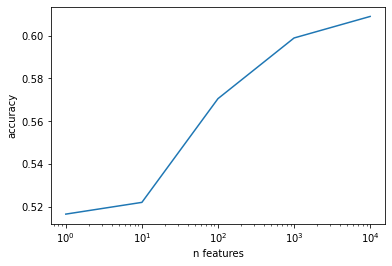

In [6]:
import matplotlib.pyplot as plt
from sklearn import metrics
ns = [1,10,100,1000,10000,10000]
scores = []
for n in ns:
    h = FeatureHasher(n_features=n, input_type='string')
    transformed_X = h.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2, random_state=1337)
    scores.append(svc_clas().fit(X_train, y_train).score(X_test, y_test))
plt.plot(ns, scores)
plt.xscale('log'); plt.ylabel('accuracy'); plt.xlabel('n features')
plt.show()

**Bag of clusters**

In [13]:
c2v = brown_df['cluster'].unique()
c2v = dict(zip(c2v, np.eye(len(c2v))))
w2v = {w: c2v[c] for w, c in zip(brown_df['word'], brown_df['cluster'])}
X = np.array([np.sum([w2v[t] for t in tweet.tokens if t in w2v], axis=0) for tweet in training_set.tweets])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)
svc_clas().fit(X_train, y_train).score(X_test, y_test)

0.6034798534798534